In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mens-t20-cwc-dataset-2007-2004/all_t20_world_cup_matches_results.csv
/kaggle/input/mens-t20-cwc-dataset-2007-2004/all_t20_world_cup_players_list.csv
/kaggle/input/mens-t20-cwc-dataset-2007-2004/wc_final_dataset.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3rd Dataset 
T20_Matches = pd.read_csv('/kaggle/input/mens-t20-cwc-dataset-2007-2004/wc_final_dataset.csv')

# 2nd Dataset
Team_Players = pd.read_csv('/kaggle/input/mens-t20-cwc-dataset-2007-2004/all_t20_world_cup_players_list.csv')

# **Basic Functions**

### **I won't use first Dataset because 1st and 3rd dataset almost similar.**

In [3]:
T20_Matches.head()

,Team1,Team2,Winner,Margin,Ground,Match Date,T-20 Int Match,Team1 Avg Batting Ranking,Team2 Avg Batting Ranking,Team1 Avg Bowling Ranking,Team2 Avg Bowling Ranking,Team1 Total WCs participated,Team1 Total WCs won,Team2 Total WCs participated,Team2 Total WCs won,Team1 win % over Team2
0,India,Pakistan,India,5 runs,Johannesburg,2007/09/24,T20I # 46,67.13,65.87,80.67,63.40,0,0,0,0,100.0
1,Australia,India,India,15 runs,Durban,2007/09/22,T20I # 45,66.54,70.20,58.77,82.40,0,0,0,0,0.0
2,New Zealand,Pakistan,Pakistan,6 wickets,Cape Town,2007/09/22,T20I # 44,66.07,67.20,68.60,66.60,0,0,0,0,0.0
3,South Africa,India,India,37 runs,Durban,2007/09/20,T20I # 43,69.53,75.67,76.93,86.33,0,0,0,0,0.0
4,Bangladesh,Pakistan,Pakistan,4 wickets,Cape Town,2007/09/20,T20I # 42,75.53,69.67,70.60,68.33,0,0,0,0,0.0


### **In this Dataset we don't have Null values**

In [4]:
T20_Matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Team1                         317 non-null    object 
 1   Team2                         317 non-null    object 
 2   Winner                        317 non-null    object 
 3   Margin                        317 non-null    object 
 4   Ground                        317 non-null    object 
 5   Match Date                    317 non-null    object 
 6   T-20 Int Match                317 non-null    object 
 7   Team1 Avg Batting Ranking     317 non-null    float64
 8   Team2 Avg Batting Ranking     317 non-null    float64
 9   Team1 Avg Bowling Ranking     317 non-null    float64
 10  Team2 Avg Bowling Ranking     317 non-null    float64
 11  Team1 Total WCs participated  317 non-null    int64  
 12  Team1 Total WCs won           317 non-null    int64  
 13  Team2

In [5]:
T20_Matches.dtypes

Team1                            object
Team2                            object
Winner                           object
Margin                           object
Ground                           object
Match Date                       object
T-20 Int Match                   object
Team1 Avg Batting Ranking       float64
Team2 Avg Batting Ranking       float64
Team1 Avg Bowling Ranking       float64
Team2 Avg Bowling Ranking       float64
Team1 Total WCs participated      int64
Team1 Total WCs won               int64
Team2 Total WCs participated      int64
Team2 Total WCs won               int64
Team1 win % over Team2          float64
dtype: object

In [6]:
T20_Matches.describe()

,Team1 Avg Batting Ranking,Team2 Avg Batting Ranking,Team1 Avg Bowling Ranking,Team2 Avg Bowling Ranking,Team1 Total WCs participated,Team1 Total WCs won,Team2 Total WCs participated,Team2 Total WCs won,Team1 win % over Team2
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000
mean,81.831420,81.921830,81.824669,82.948707,3.694006,0.299685,3.526814,0.331230,31.862776
std,9.521749,10.248014,9.410076,10.217811,2.612845,0.546942,2.584657,0.528375,34.688898
min,64.070000,64.930000,58.770000,63.400000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.730000,73.330000,75.000000,74.400000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,80.470000,80.310000,81.270000,81.600000,4.000000,0.000000,3.000000,0.000000,25.000000
75%,89.000000,90.670000,86.930000,91.730000,6.000000,1.000000,6.000000,1.000000,57.140000
max,101.000000,101.000000,101.000000,101.000000,8.000000,2.000000,8.000000,2.000000,100.000000


In [7]:
# Sum of all the Null values in the Dataset
T20_Matches.isnull().sum()

Team1                           0
Team2                           0
Winner                          0
Margin                          0
Ground                          0
Match Date                      0
T-20 Int Match                  0
Team1 Avg Batting Ranking       0
Team2 Avg Batting Ranking       0
Team1 Avg Bowling Ranking       0
Team2 Avg Bowling Ranking       0
Team1 Total WCs participated    0
Team1 Total WCs won             0
Team2 Total WCs participated    0
Team2 Total WCs won             0
Team1 win % over Team2          0
dtype: int64

In [8]:
# Shape of the Dataset
T20_Matches.shape

(317, 16)

In [9]:
# All Unique Teams Since 2007 to 2024  => We have 24 teams
Unique_Teams = pd.concat([T20_Matches['Team1'], T20_Matches['Team2']]).unique()

Unique_Teams

array(['India', 'Australia', 'New Zealand', 'South Africa', 'Bangladesh',
       'England', 'Pakistan', 'Kenya', 'Sri Lanka', 'Ireland',
       'Netherlands', 'Scotland', 'West Indies', 'Afghanistan', 'UAE',
       'Hong Kong', 'Namibia', 'Oman', 'PNG', 'Nepal', 'USA', 'Canada',
       'Zimbabwe', 'Uganda'], dtype=object)

In [10]:
# All Grounds used to play Since 2007 to 2024  => We have 39 Grounds
Unique_Grounds = T20_Matches['Ground'].unique()


Unique_Grounds

array(['Johannesburg', 'Durban', 'Cape Town', "Lord's", 'The Oval',
       'Nottingham', 'Bridgetown', 'Gros Islet', 'Providence',
       'Colombo (RPS)', 'Pallekele', 'Hambantota', 'Mirpur', 'Chattogram',
       'Sylhet', 'Eden Gardens', 'Wankhede', 'Delhi', 'Mohali', 'Nagpur',
       'Bengaluru', 'Dharamsala', 'Dubai (DICS)', 'Abu Dhabi', 'Sharjah',
       'Al Amerat', 'Melbourne', 'Adelaide', 'Sydney', 'Brisbane',
       'Perth', 'Hobart', 'Geelong', 'Tarouba', 'Kingstown',
       'North Sound', 'Lauderhill', 'New York', 'Dallas'], dtype=object)

### **T20 World Cup Years**

In [11]:
Unique_Years = pd.to_datetime(T20_Matches['Match Date']).dt.year.unique()

Unique_Years

array([2007, 2009, 2010, 2012, 2014, 2016, 2021, 2022, 2024], dtype=int32)

# **Change the Datatype**


In [12]:
# Change the Datatype of Match Date column

T20_Matches['Match Date'] = pd.to_datetime(T20_Matches['Match Date'])

T20_Matches.dtypes

Team1                                   object
Team2                                   object
Winner                                  object
Margin                                  object
Ground                                  object
Match Date                      datetime64[ns]
T-20 Int Match                          object
Team1 Avg Batting Ranking              float64
Team2 Avg Batting Ranking              float64
Team1 Avg Bowling Ranking              float64
Team2 Avg Bowling Ranking              float64
Team1 Total WCs participated             int64
Team1 Total WCs won                      int64
Team2 Total WCs participated             int64
Team2 Total WCs won                      int64
Team1 win % over Team2                 float64
dtype: object

# **Exploratory Data Analysis (EDA)**

In [13]:
# Droped multiple columns from the Dataset 
T20_Matches.drop(['T-20 Int Match','Team1 Total WCs participated','Team2 Total WCs participated','Team1 win % over Team2'],axis=1,inplace=True)

T20_Matches.head()

,Team1,Team2,Winner,Margin,Ground,Match Date,Team1 Avg Batting Ranking,Team2 Avg Batting Ranking,Team1 Avg Bowling Ranking,Team2 Avg Bowling Ranking,Team1 Total WCs won,Team2 Total WCs won
0,India,Pakistan,India,5 runs,Johannesburg,2007-09-24,67.13,65.87,80.67,63.40,0,0
1,Australia,India,India,15 runs,Durban,2007-09-22,66.54,70.20,58.77,82.40,0,0
2,New Zealand,Pakistan,Pakistan,6 wickets,Cape Town,2007-09-22,66.07,67.20,68.60,66.60,0,0
3,South Africa,India,India,37 runs,Durban,2007-09-20,69.53,75.67,76.93,86.33,0,0
4,Bangladesh,Pakistan,Pakistan,4 wickets,Cape Town,2007-09-20,75.53,69.67,70.60,68.33,0,0


### **All the Unique values from Winner column**

In [14]:
T20_Matches['Winner'].unique()

array(['India', 'Pakistan', 'Australia', 'South Africa', 'Sri Lanka',
       'New Zealand', 'tied', 'no result', 'England', 'Bangladesh',
       'Zimbabwe', 'West Indies', 'Ireland', 'Netherlands', 'Hong Kong',
       'Nepal', 'Afghanistan', 'Scotland', 'Oman', 'Namibia', 'UAE',
       'Canada', 'Uganda', 'USA'], dtype=object)

#### **All the tied Matches since 2007**

In [15]:
T20_Matches[T20_Matches['Winner'] == 'tied']

,Team1,Team2,Winner,Margin,Ground,Match Date,Team1 Avg Batting Ranking,Team2 Avg Batting Ranking,Team1 Avg Bowling Ranking,Team2 Avg Bowling Ranking,Team1 Total WCs won,Team2 Total WCs won
17,India,Pakistan,tied,-,Durban,2007-09-14,95.13,67.00,97.40,73.27,0,0
87,New Zealand,West Indies,tied,-,Pallekele,2012-10-01,72.27,70.67,72.07,81.40,0,0
95,Sri Lanka,New Zealand,tied,-,Pallekele,2012-09-27,84.47,73.60,75.67,71.60,0,0
306,USA,Pakistan,tied,-,Dallas,2024-06-06,101.00,82.07,101.00,89.87,0,1
314,Namibia,Oman,tied,-,Bridgetown,2024-06-02,100.25,101.00,99.75,101.00,0,0


### **Droping all the tied Matches from the Dataset**
- We had total 5 rows in Winner column where values were tied.

In [16]:
# Droping the rows from the DataFrame by assigning index values!
T20_Matches.drop([17,87,95,306,314],inplace=True)

# It is returning empty DataFrame because there are not tied matches in Winner column.
T20_Matches[T20_Matches['Winner'] == 'tied']   


,Team1,Team2,Winner,Margin,Ground,Match Date,Team1 Avg Batting Ranking,Team2 Avg Batting Ranking,Team1 Avg Bowling Ranking,Team2 Avg Bowling Ranking,Team1 Total WCs won,Team2 Total WCs won


### **Matches where Winners were not declared for some reasons.**
- **Tie**: If both teams score the same number of runs at the end of their respective innings, the match is considered a tie.
- **No Result**: If the match is interrupted (e.g., due to rain) and cannot be completed, it is declared a no result.
- **Abandoned Game**: If the match is called off before it starts or during play due to unforeseen circumstances like bad weather or unsafe playing conditions.

In [17]:
T20_Matches[T20_Matches['Winner'] == 'no result']

,Team1,Team2,Winner,Margin,Ground,Match Date,Team1 Avg Batting Ranking,Team2 Avg Batting Ranking,Team1 Avg Bowling Ranking,Team2 Avg Bowling Ranking,Team1 Total WCs won,Team2 Total WCs won
20,India,Scotland,no result,-,Durban,2007-09-13,94.93,95.33,97.80,95.60,0,0
71,England,Ireland,no result,-,Providence,2010-05-04,76.93,92.47,81.87,84.20,0,0
97,Ireland,West Indies,no result,-,Colombo (RPS),2012-09-24,87.87,71.80,79.73,81.00,0,0
170,Bangladesh,Ireland,no result,-,Dharamsala,2016-03-11,80.07,88.47,76.93,86.73,0,0
171,Netherlands,Oman,no result,-,Dharamsala,2016-03-11,83.13,96.47,82.13,99.67,0,0
247,South Africa,Zimbabwe,no result,-,Hobart,2022-10-24,65.64,97.60,70.71,89.20,0,0
311,England,Scotland,no result,-,Bridgetown,2024-06-04,76.80,94.47,72.33,94.60,2,0


### **Droping all the Matches from the Dataset Where Winner values are No Result**
- We had total 7 rows in Winner column where values were No Result.

In [18]:
# Droping the rows from the DataFrame by assigning index values!
T20_Matches.drop([20,71,97,170,171,247,311],inplace=True)

# It is returning empty DataFrame because there are not no result matches in Winner column.
T20_Matches[T20_Matches['Winner'] == 'no result']

,Team1,Team2,Winner,Margin,Ground,Match Date,Team1 Avg Batting Ranking,Team2 Avg Batting Ranking,Team1 Avg Bowling Ranking,Team2 Avg Bowling Ranking,Team1 Total WCs won,Team2 Total WCs won


## **Create Columns**


### **Created 2 columns**
- **Won_By_Runs**
- **Won_By_Wickets**

In [19]:
# Split Entire DataFrame into 2 Different DataFrames on the behalf Margin column(Runs and Wickets)
Won_By_Wickets = T20_Matches[T20_Matches['Margin'].str.contains('wickets')]
Won_By_Runs = T20_Matches[T20_Matches['Margin'].str.contains('runs')]


# Apply lambda function on the Dataset to identify does column contains runs if yes then put the runs in New Columns otherwise NaN value.
T20_Matches['Won_By_Runs'] = Won_By_Runs['Margin'].apply(lambda x: int(x.split()[0]) if 'runs' in str(x) else np.nan)


# Apply lambda function on the Dataset to identify does column contains runs if yes then put the runs in New Columns otherwise NaN value.
T20_Matches['Won_By_Wickets'] = Won_By_Wickets['Margin'].apply(lambda x: int(x.split()[0]) if 'wickets' in str(x) else np.nan)


#### **Change the Datatypes of the New Columns**

In [20]:
# Convert Won_By_Runs to int, replacing NaN with 0
T20_Matches['Won_By_Runs'] = T20_Matches['Won_By_Runs'].fillna(0).astype(int)

# Convert Won_By_Wickets to int, replacing NaN with 0
T20_Matches['Won_By_Wickets'] = T20_Matches['Won_By_Wickets'].fillna(0).astype(int)

In [21]:
T20_Matches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 0 to 316
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Team1                      305 non-null    object        
 1   Team2                      305 non-null    object        
 2   Winner                     305 non-null    object        
 3   Margin                     305 non-null    object        
 4   Ground                     305 non-null    object        
 5   Match Date                 305 non-null    datetime64[ns]
 6   Team1 Avg Batting Ranking  305 non-null    float64       
 7   Team2 Avg Batting Ranking  305 non-null    float64       
 8   Team1 Avg Bowling Ranking  305 non-null    float64       
 9   Team2 Avg Bowling Ranking  305 non-null    float64       
 10  Team1 Total WCs won        305 non-null    int64         
 11  Team2 Total WCs won        305 non-null    int64         
 12  Won_By_Runs  

In [22]:
T20_Matches.head()

,Team1,Team2,Winner,Margin,Ground,Match Date,Team1 Avg Batting Ranking,Team2 Avg Batting Ranking,Team1 Avg Bowling Ranking,Team2 Avg Bowling Ranking,Team1 Total WCs won,Team2 Total WCs won,Won_By_Runs,Won_By_Wickets
0,India,Pakistan,India,5 runs,Johannesburg,2007-09-24,67.13,65.87,80.67,63.40,0,0,5,0
1,Australia,India,India,15 runs,Durban,2007-09-22,66.54,70.20,58.77,82.40,0,0,15,0
2,New Zealand,Pakistan,Pakistan,6 wickets,Cape Town,2007-09-22,66.07,67.20,68.60,66.60,0,0,0,6
3,South Africa,India,India,37 runs,Durban,2007-09-20,69.53,75.67,76.93,86.33,0,0,37,0
4,Bangladesh,Pakistan,Pakistan,4 wickets,Cape Town,2007-09-20,75.53,69.67,70.60,68.33,0,0,0,4


### **Created 2 more columns**
- **1st Batting** :- If winning team Won_By_Runs. So 1's are assigned in 1st Batting column otherwise 0
- **2nd Batting** :- If winning team Won_By_Wickets. So 1's are assigned in 2nd Batting column otherwise 0

In [23]:
# Create 1st column where winning team assigned 1 if won_by_runs otherwise 0
T20_Matches['1st Batting'] = T20_Matches['Won_By_Runs'].apply(lambda x: 1 if x > 0 else 0)

# Create 2nd column where winning team assigned 1 if won_by_wickets otherwise 0
T20_Matches['2nd Batting'] = T20_Matches['Won_By_Wickets'].apply(lambda x: 1 if x > 0 else 0)


In [24]:
T20_Matches.head()

,Team1,Team2,Winner,Margin,Ground,Match Date,Team1 Avg Batting Ranking,Team2 Avg Batting Ranking,Team1 Avg Bowling Ranking,Team2 Avg Bowling Ranking,Team1 Total WCs won,Team2 Total WCs won,Won_By_Runs,Won_By_Wickets,1st Batting,2nd Batting
0,India,Pakistan,India,5 runs,Johannesburg,2007-09-24,67.13,65.87,80.67,63.40,0,0,5,0,1,0
1,Australia,India,India,15 runs,Durban,2007-09-22,66.54,70.20,58.77,82.40,0,0,15,0,1,0
2,New Zealand,Pakistan,Pakistan,6 wickets,Cape Town,2007-09-22,66.07,67.20,68.60,66.60,0,0,0,6,0,1
3,South Africa,India,India,37 runs,Durban,2007-09-20,69.53,75.67,76.93,86.33,0,0,37,0,1,0
4,Bangladesh,Pakistan,Pakistan,4 wickets,Cape Town,2007-09-20,75.53,69.67,70.60,68.33,0,0,0,4,0,1


In [25]:
T20_Matches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 0 to 316
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Team1                      305 non-null    object        
 1   Team2                      305 non-null    object        
 2   Winner                     305 non-null    object        
 3   Margin                     305 non-null    object        
 4   Ground                     305 non-null    object        
 5   Match Date                 305 non-null    datetime64[ns]
 6   Team1 Avg Batting Ranking  305 non-null    float64       
 7   Team2 Avg Batting Ranking  305 non-null    float64       
 8   Team1 Avg Bowling Ranking  305 non-null    float64       
 9   Team2 Avg Bowling Ranking  305 non-null    float64       
 10  Team1 Total WCs won        305 non-null    int64         
 11  Team2 Total WCs won        305 non-null    int64         
 12  Won_By_Runs  

### **Created 1 more column**
- **Opponent**:- Opponent of winner team in each match.

In [26]:
# Used lambda function to fetch opponent of winners in every match
T20_Matches['Opponent'] = T20_Matches.apply(lambda x: x['Team2'] if x['Winner'] == x['Team1'] else x['Team1'], axis=1)

T20_Matches.head()

,Team1,Team2,Winner,Margin,Ground,Match Date,Team1 Avg Batting Ranking,Team2 Avg Batting Ranking,Team1 Avg Bowling Ranking,Team2 Avg Bowling Ranking,Team1 Total WCs won,Team2 Total WCs won,Won_By_Runs,Won_By_Wickets,1st Batting,2nd Batting,Opponent
0,India,Pakistan,India,5 runs,Johannesburg,2007-09-24,67.13,65.87,80.67,63.40,0,0,5,0,1,0,Pakistan
1,Australia,India,India,15 runs,Durban,2007-09-22,66.54,70.20,58.77,82.40,0,0,15,0,1,0,Australia
2,New Zealand,Pakistan,Pakistan,6 wickets,Cape Town,2007-09-22,66.07,67.20,68.60,66.60,0,0,0,6,0,1,New Zealand
3,South Africa,India,India,37 runs,Durban,2007-09-20,69.53,75.67,76.93,86.33,0,0,37,0,1,0,South Africa
4,Bangladesh,Pakistan,Pakistan,4 wickets,Cape Town,2007-09-20,75.53,69.67,70.60,68.33,0,0,0,4,0,1,Bangladesh


In [27]:
T20_Matches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 0 to 316
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Team1                      305 non-null    object        
 1   Team2                      305 non-null    object        
 2   Winner                     305 non-null    object        
 3   Margin                     305 non-null    object        
 4   Ground                     305 non-null    object        
 5   Match Date                 305 non-null    datetime64[ns]
 6   Team1 Avg Batting Ranking  305 non-null    float64       
 7   Team2 Avg Batting Ranking  305 non-null    float64       
 8   Team1 Avg Bowling Ranking  305 non-null    float64       
 9   Team2 Avg Bowling Ranking  305 non-null    float64       
 10  Team1 Total WCs won        305 non-null    int64         
 11  Team2 Total WCs won        305 non-null    int64         
 12  Won_By_Runs  

### **Created 1 more column**
- **Year**:- Where only years are extracted from the Match Date column.

In [28]:
# Create column with the name Year where only years are available from the Match Date column. 
T20_Matches['Year'] = pd.to_datetime(T20_Matches['Match Date']).dt.year

T20_Matches.head()

,Team1,Team2,Winner,Margin,Ground,Match Date,Team1 Avg Batting Ranking,Team2 Avg Batting Ranking,Team1 Avg Bowling Ranking,Team2 Avg Bowling Ranking,Team1 Total WCs won,Team2 Total WCs won,Won_By_Runs,Won_By_Wickets,1st Batting,2nd Batting,Opponent,Year
0,India,Pakistan,India,5 runs,Johannesburg,2007-09-24,67.13,65.87,80.67,63.40,0,0,5,0,1,0,Pakistan,2007
1,Australia,India,India,15 runs,Durban,2007-09-22,66.54,70.20,58.77,82.40,0,0,15,0,1,0,Australia,2007
2,New Zealand,Pakistan,Pakistan,6 wickets,Cape Town,2007-09-22,66.07,67.20,68.60,66.60,0,0,0,6,0,1,New Zealand,2007
3,South Africa,India,India,37 runs,Durban,2007-09-20,69.53,75.67,76.93,86.33,0,0,37,0,1,0,South Africa,2007
4,Bangladesh,Pakistan,Pakistan,4 wickets,Cape Town,2007-09-20,75.53,69.67,70.60,68.33,0,0,0,4,0,1,Bangladesh,2007


### Created One more column

In [29]:
T20_Matches['Times'] = 1

T20_Matches.head()

,Team1,Team2,Winner,Margin,Ground,Match Date,Team1 Avg Batting Ranking,Team2 Avg Batting Ranking,Team1 Avg Bowling Ranking,Team2 Avg Bowling Ranking,Team1 Total WCs won,Team2 Total WCs won,Won_By_Runs,Won_By_Wickets,1st Batting,2nd Batting,Opponent,Year,Times
0,India,Pakistan,India,5 runs,Johannesburg,2007-09-24,67.13,65.87,80.67,63.40,0,0,5,0,1,0,Pakistan,2007,1
1,Australia,India,India,15 runs,Durban,2007-09-22,66.54,70.20,58.77,82.40,0,0,15,0,1,0,Australia,2007,1
2,New Zealand,Pakistan,Pakistan,6 wickets,Cape Town,2007-09-22,66.07,67.20,68.60,66.60,0,0,0,6,0,1,New Zealand,2007,1
3,South Africa,India,India,37 runs,Durban,2007-09-20,69.53,75.67,76.93,86.33,0,0,37,0,1,0,South Africa,2007,1
4,Bangladesh,Pakistan,Pakistan,4 wickets,Cape Town,2007-09-20,75.53,69.67,70.60,68.33,0,0,0,4,0,1,Bangladesh,2007,1


## **Some Amazing information**

### Final Winners of each World Cup

In [30]:
# Drop all the Duplicate years and keep the first row of each year!
Final_Winners = T20_Matches.drop_duplicates(subset='Year', keep='first')

# Fetched only required Columns of the DataFrame.
Final_Winners[['Team1','Team2','Winner','Margin','Ground','1st Batting','2nd Batting','Year']]

,Team1,Team2,Winner,Margin,Ground,1st Batting,2nd Batting,Year
0,India,Pakistan,India,5 runs,Johannesburg,1,0,2007
27,Pakistan,Sri Lanka,Pakistan,8 wickets,Lord's,0,1,2009
54,Australia,England,England,7 wickets,Bridgetown,0,1,2010
81,Sri Lanka,West Indies,West Indies,36 runs,Colombo (RPS),1,0,2012
108,India,Sri Lanka,Sri Lanka,6 wickets,Mirpur,0,1,2014
143,England,West Indies,West Indies,4 wickets,Eden Gardens,0,1,2016
178,Australia,New Zealand,Australia,8 wickets,Dubai (DICS),0,1,2021
223,England,Pakistan,England,5 wickets,Melbourne,0,1,2022
265,India,South Africa,India,7 runs,Bridgetown,1,0,2024


### **Which team won most number of matches against Opponents**

In [31]:
# Grouped all the Winners and Opponents to figure out winners won most matches against opponent

T20_Matches.groupby(['Winner','Opponent'])['Times'].sum().reset_index().pivot(index='Opponent',columns='Winner',values='Times').fillna('.')


Winner,Afghanistan,Australia,Bangladesh,Canada,England,Hong Kong,India,Ireland,Namibia,Nepal,...,Oman,Pakistan,Scotland,South Africa,Sri Lanka,UAE,USA,Uganda,West Indies,Zimbabwe
Opponent,,,,,,,,,,,,,,,,,,,,,
Afghanistan,.,1.0,1.0,.,3.0,.,4.0,.,.,1.0,...,.,1.0,.,3.0,2.0,.,.,.,1.0,.
Australia,1.0,.,.,.,2.0,.,4.0,.,.,.,...,.,3.0,.,.,1.0,.,.,.,3.0,1.0
Bangladesh,1.0,6.0,.,.,1.0,1.0,5.0,1.0,.,.,...,.,6.0,1.0,4.0,2.0,.,.,.,2.0,.
Canada,.,.,.,.,.,.,.,.,.,.,...,.,1.0,.,.,.,.,1.0,.,.,.
England,.,2.0,.,.,.,.,3.0,1.0,.,.,...,.,.,.,5.0,1.0,.,.,.,5.0,.
Hong Kong,2.0,.,.,.,.,.,.,.,.,1.0,...,.,.,1.0,.,.,.,.,.,.,1.0
India,.,2.0,.,.,2.0,.,.,.,.,.,...,.,1.0,.,2.0,2.0,.,.,.,3.0,.
Ireland,.,2.0,.,1.0,.,.,2.0,.,1.0,.,...,1.0,2.0,.,.,3.0,.,.,.,1.0,1.0
Kenya,.,.,.,.,.,.,.,.,.,.,...,.,.,.,.,1.0,.,.,.,.,.


### Number of Matches won by each team on grounds

In [32]:
# This is to display all the rows of the Dataset!
pd.set_option('display.max_columns', None)

# Group the data on Winners and Grounds and convert resulted data in wide format by using pivot function. And fill all the NaN values with . (dot).
T20_Matches.groupby(['Winner', 'Ground'])['Times'].sum().reset_index().pivot(index='Ground', columns='Winner', values='Times').fillna('-')


Winner,Afghanistan,Australia,Bangladesh,Canada,England,Hong Kong,India,Ireland,Namibia,Nepal,Netherlands,New Zealand,Oman,Pakistan,Scotland,South Africa,Sri Lanka,UAE,USA,Uganda,West Indies,Zimbabwe
Ground,,,,,,,,,,,,,,,,,,,,,,
Abu Dhabi,1.0,2.0,-,-,1.0,-,1.0,1.0,2.0,-,-,2.0,-,1.0,-,1.0,3.0,-,-,-,-,-
Adelaide,-,1.0,-,-,1.0,-,1.0,-,-,-,2.0,1.0,-,1.0,-,-,-,-,-,-,-,-
Al Amerat,-,-,2.0,-,-,-,-,-,-,-,-,-,1.0,-,3.0,-,-,-,-,-,-,-
Bengaluru,-,1.0,-,-,-,-,1.0,-,-,-,-,-,-,-,-,-,-,-,-,-,1.0,-
Bridgetown,-,5.0,-,-,4.0,-,2.0,-,-,-,-,1.0,-,-,1.0,2.0,1.0,-,-,-,2.0,-
Brisbane,-,1.0,1.0,-,1.0,-,-,-,-,-,-,-,-,-,-,-,1.0,-,-,-,-,-
Cape Town,-,3.0,-,-,1.0,-,-,-,-,-,-,-,-,2.0,-,2.0,-,-,-,-,-,1.0
Chattogram,1.0,-,1.0,-,1.0,1.0,-,-,-,2.0,1.0,2.0,-,-,-,3.0,3.0,-,-,-,-,-
Colombo (RPS),-,4.0,-,-,1.0,-,4.0,-,-,-,-,-,-,2.0,-,-,1.0,-,-,-,2.0,-


### **Teams won highest number of matches in each year**

In [33]:
# Grouped winner and year columns and convert the data into wide format.
T20_Matches.groupby(['Winner','Year'])['Times'].sum().reset_index().pivot(index='Year',columns='Winner',values='Times').fillna(' ')



Winner,Afghanistan,Australia,Bangladesh,Canada,England,Hong Kong,India,Ireland,Namibia,Nepal,Netherlands,New Zealand,Oman,Pakistan,Scotland,South Africa,Sri Lanka,UAE,USA,Uganda,West Indies,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,,
2007,,3.0,1.0,,1.0,,4.0,,,,,3.0,,5.0,,4.0,3.0,,,,,1.0
2009,,,,,2.0,,2.0,1.0,,,1.0,2.0,,5.0,,5.0,6.0,,,,3.0,
2010,,6.0,,,5.0,,2.0,,,,,3.0,,2.0,,2.0,3.0,,,,3.0,
2012,,4.0,,,2.0,,4.0,,,,,1.0,,4.0,,2.0,4.0,,,,3.0,
2014,1.0,1.0,2.0,,1.0,1.0,5.0,2.0,,2.0,3.0,2.0,,2.0,,3.0,5.0,,,,3.0,2.0
2016,4.0,2.0,2.0,,4.0,,3.0,,,,1.0,4.0,1.0,1.0,1.0,2.0,1.0,,,,5.0,2.0
2021,2.0,6.0,2.0,,4.0,,3.0,1.0,3.0,,,5.0,1.0,5.0,3.0,4.0,5.0,,,,1.0,
2022,,3.0,2.0,,5.0,,4.0,3.0,1.0,,4.0,3.0,,4.0,1.0,2.0,4.0,1.0,,,1.0,3.0
2024,5.0,5.0,3.0,1.0,4.0,,8.0,,,,1.0,2.0,,2.0,2.0,8.0,1.0,,1.0,1.0,5.0,



# **Visualization**

### **Total Matches Won by Each time Since 2007 to 2024**

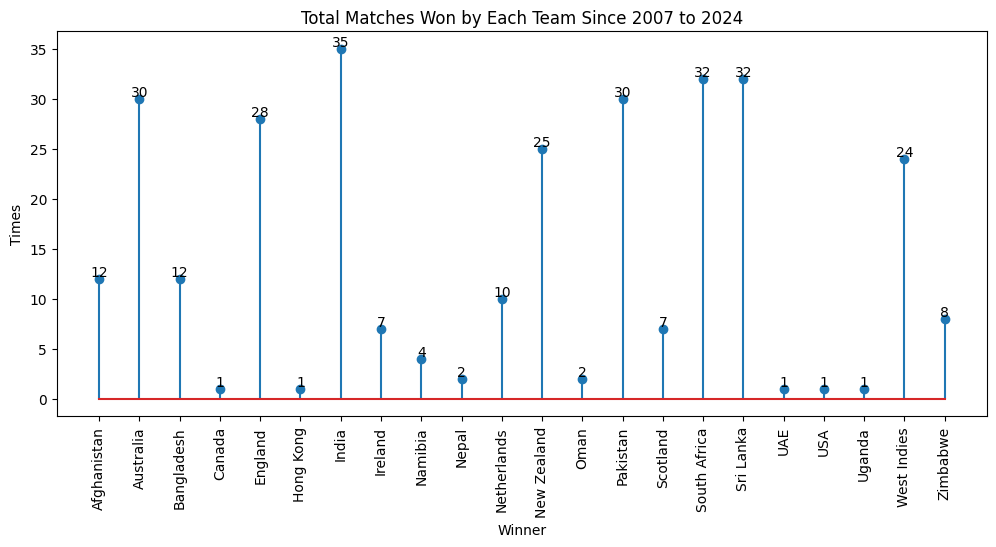

In [34]:
# Change the figure size of the Graph
plt.figure(figsize=(12,5))

# Grouped all the winners and times they won in T20 World cup since 2007 to 2024
Won_Matches = T20_Matches.groupby('Winner')['Times'].sum().reset_index()

# Graph 
plt.stem(Won_Matches['Winner'],Won_Matches['Times'])

# Loop to extract index numbers and values of Times to display on graph. 
for idx, value in enumerate(Won_Matches['Times']):
    plt.text(idx, value, str(value), ha='center', va='bottom')

# Labeling the axes and adding a title
plt.xlabel('Winner')
plt.ylabel('Times')
plt.title('Total Matches Won by Each Team Since 2007 to 2024')

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()

### **Teams Won number of Matches by Batting 1st time**

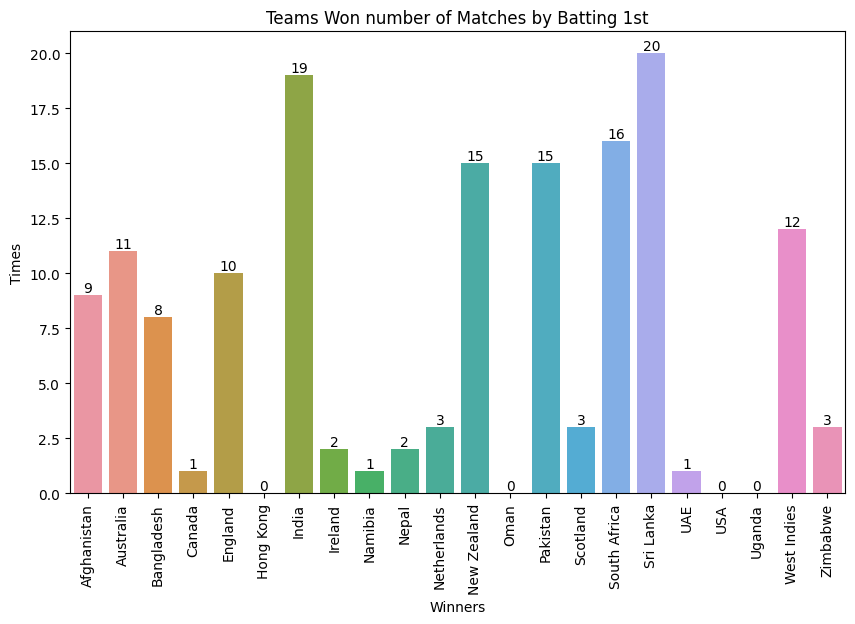

In [35]:
# Change the Graph size
plt.figure(figsize=(10,6))

# Grouped all the Winners and calculated 1st batting winners
Batting_1st_Winners = T20_Matches.groupby('Winner')['1st Batting'].sum().reset_index()

# Filter the Dataset to extract imp. information.
sns.barplot(Batting_1st_Winners,x='Winner',y='1st Batting')


# Loop to fetch index no. and values
for index, values in enumerate(Batting_1st_Winners['1st Batting']):
    plt.text(index, values, str(values), ha='center', va='bottom')     # Display values on bar graphs to understand values of each graph!
    
# Adding Lables and Title 
plt.xlabel('Winners')
plt.ylabel('Times')
plt.title('Teams Won number of Matches by Batting 1st')

# 
plt.xticks(rotation=90)


plt.show()

### **Teams Won number of Matches by Batting 2ns time**

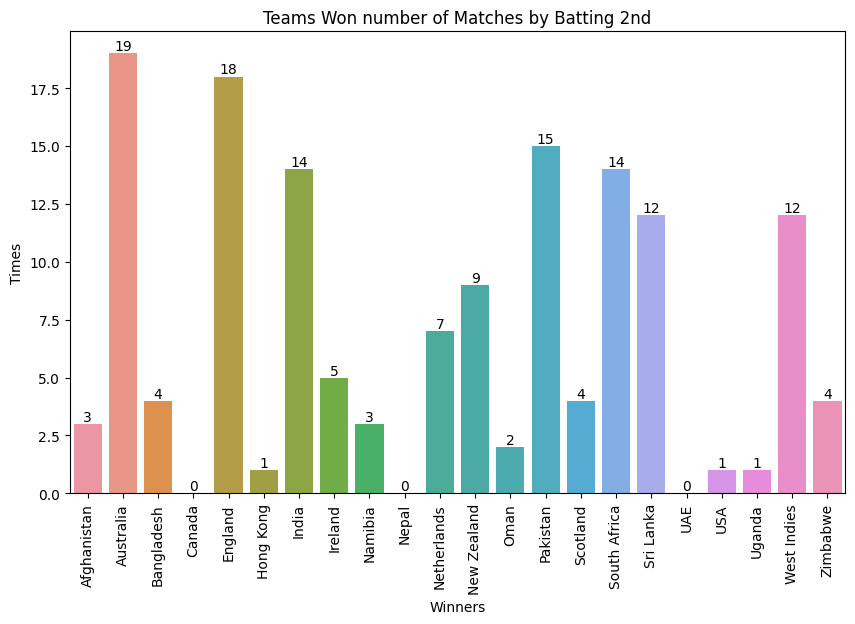

In [36]:
# Change the size of the Graph
plt.figure(figsize=(10,6))

# Grouped all the Winners and calculated 1st batting winners
Batting_1st_Winners = T20_Matches.groupby('Winner')['2nd Batting'].sum().reset_index()

# Bar graph
sns.barplot(Batting_1st_Winners,x='Winner',y='2nd Batting')

# Loop to fetch index and values of 2nd batting to display values over Bar graphs
for index, values in enumerate(Batting_1st_Winners['2nd Batting']):
    plt.text(index, values, str(values), ha='center', va='bottom')
    
# Adding labels and title to the graph
plt.xlabel('Winners')
plt.ylabel('Times')
plt.title('Teams Won number of Matches by Batting 2nd')

# Change the direction of x-ticks by 90 degree
plt.xticks(rotation=90)

plt.show()

### **Teams won by More than 100 runs**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


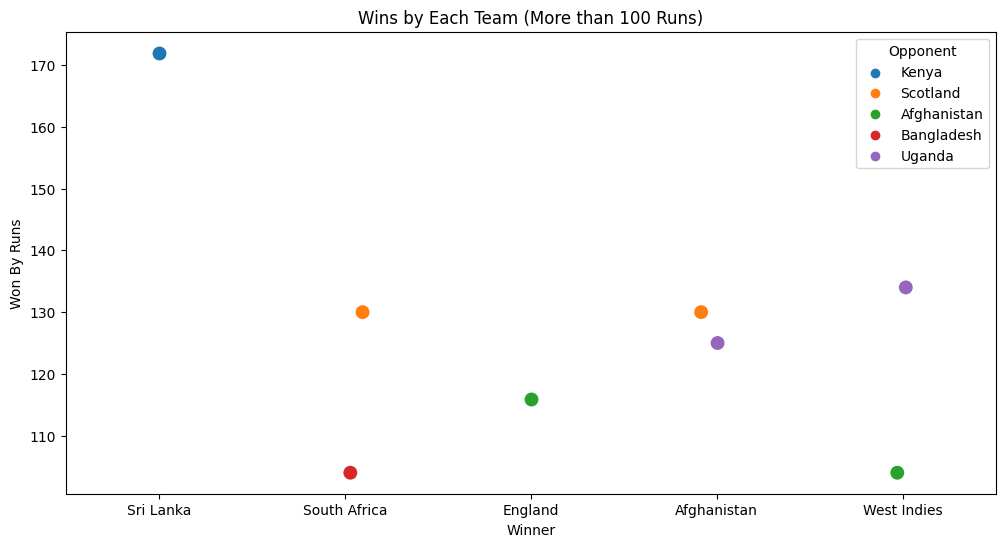

In [37]:
# Filter the DataFrame
Runs_Winners = T20_Matches[T20_Matches['Won_By_Runs'] > 100]

# Change the size of the graph
plt.figure(figsize=(12, 6))

# Display the stripplot graph 
sns.stripplot(data=Runs_Winners, x='Winner', y='Won_By_Runs', hue='Opponent',size=10)

# Set labels and title
plt.xlabel('Winner')
plt.ylabel('Won By Runs')
plt.title('Wins by Each Team (More than 100 Runs)')

plt.show()

### **Teams Won by 10 Wickets**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


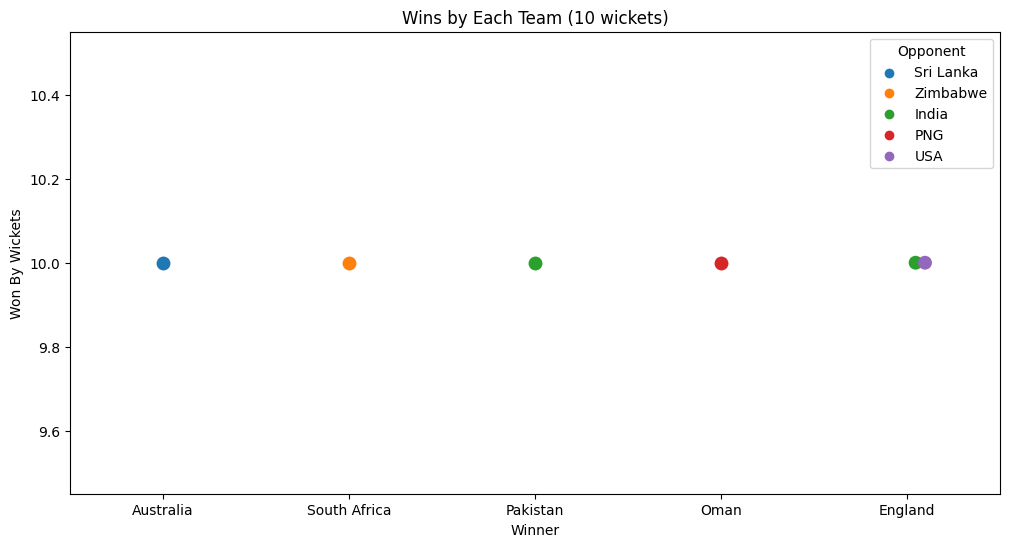

In [38]:
# Filter the DataFrame
Wickets_Winners = T20_Matches[T20_Matches['Won_By_Wickets'] == 10]

# Change the size of the graph
plt.figure(figsize=(12, 6))

# # Display the stripplot graph 
sns.stripplot(data=Wickets_Winners, x='Winner', y='Won_By_Wickets', hue='Opponent',size=10)

# # Set labels and title
plt.xlabel('Winner')
plt.ylabel('Won By Wickets')
plt.title('Wins by Each Team (10 wickets)')

plt.show()

### Thanks for reading my Notebook
- **Please suggest me few things which i can improve in this Notebook or in my life to be best Data Analyst.**